This notebook if demonstation for challenge Vietnamese NLP Dataset for Continual Learning. In the past, underthesea team is only focused on tuning model. In this project, we create a simple challenge for ourselves to build a continuous learning NLP system.

## The August 2021 Challenges Vietnamese NLP Dataset for Continual Learning

The August 2021 Challenges are [part-of-speech tagging](https://en.wikipedia.org/wiki/Part-of-speech_tagging) and [dependency parsing](https://universaldependencies.org/).

### Create environment

In [1]:
%load_ext autoreload
%autoreload 2

# add project folder
import os
from os.path import dirname, join
PROJECT_FOLDER = dirname(dirname(os.getcwd()))
os.sys.path.append(PROJECT_FOLDER)

# add dependencies
from underthesea.utils.col_analyzer import UDAnalyzer, computeIDF
from underthesea.utils.col_script import RawToUDDataset
from IPython.display import display, display_png
from wordcloud import WordCloud
from PIL import Image
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# init folder
DATASETS_FOLDER = join(PROJECT_FOLDER, "datasets")
COL_FOLDER = join(DATASETS_FOLDER, "UD_Vietnamese-COL")
raw_file = join(COL_FOLDER, "corpus", "raw", "202108.txt")

Load dictionary with 31327 words.


### Datasets

In [2]:
%%capture
raw_file = join(COL_FOLDER, "corpus", "raw", "202108.txt")
dataset = RawToUDDataset(raw_file)

ud_file = join(COL_FOLDER, "corpus", "ud", "202108.txt")
dataset.write(ud_file)

In [3]:
analyzer = UDAnalyzer()

In [4]:
analyzer.analyze_dataset_len(dataset)
words_pos = analyzer.analyze_words_pos(dataset)
punctuations = set(words_pos[words_pos['pos'] == 'CH']['word'])

Number of sentences 685


In [5]:
sent_ids = analyzer.analyze_sent_ids(dataset)

In [6]:
doc_sents = analyzer.analyze_doc_sent_freq(dataset)

Number of doc URLs 66


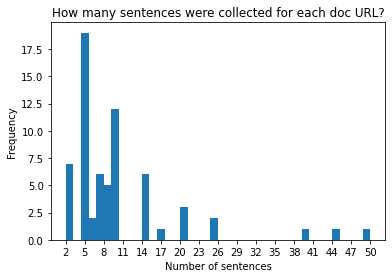

In [7]:
x = [item[1] for item in doc_sents]
plt.hist(x, bins=40)
plt.xticks(np.arange(min(x), max(x)+1, 3))
plt.title("How many sentences were collected for each doc URL?")
plt.xlabel("Number of sentences")
plt.ylabel("Frequency")
plt.show()

#### Stopwords using IDF

In [8]:
doc_word_freqs = analyzer.get_doc_word_freq(dataset).values()
idfs = computeIDF(doc_word_freqs)
print("Words with lowest IDFs are candidates for Stopwords!")
stopwords = {k: v for k, v in sorted(dict(idfs).items(), key=lambda x: x[1])[:40]}
stopwords

Words with lowest IDFs are candidates for Stopwords!


{',': 0.0,
 '.': 0.0,
 'và': 0.0871501757189002,
 'của': 0.1205739312058499,
 'là': 0.12934785551335498,
 'được': 0.12934785551335498,
 'các': 0.13830269816628143,
 'cho': 0.13830269816628143,
 'trong': 0.14744607760615122,
 'với': 0.15678610386029457,
 'người': 0.17609125905568124,
 'đã': 0.18607547996228216,
 'có': 0.1962946451439682,
 'từ': 0.20676007882213318,
 'này': 0.22847932851536945,
 'không': 0.22847932851536945,
 'theo': 0.23976033892505855,
 'để': 0.23976033892505855,
 'nhiều': 0.2513422114748737,
 'một': 0.2513422114748737,
 'ở': 0.2632414347745814,
 'đến': 0.2632414347745814,
 'đó': 0.2880650184996135,
 'cũng': 0.2880650184996135,
 'vào': 0.3010299956639812,
 'những': 0.3010299956639812,
 'khi': 0.3010299956639812,
 '(': 0.31439395722196267,
 ')': 0.31439395722196267,
 'phải': 0.3571459376429126,
 'việc': 0.3571459376429126,
 'năm': 0.37238590419964945,
 'về': 0.37238590419964945,
 'ngày': 0.3881801713828814,
 'tại': 0.3881801713828814,
 'sẽ': 0.4045705875710507,
 'như': 

In [17]:
sorted(stopwords.keys())

['(',
 ')',
 ',',
 '.',
 'cho',
 'các',
 'có',
 'cũng',
 'cả',
 'của',
 'khi',
 'không',
 'là',
 'một',
 'mới',
 'ngày',
 'người',
 'nhiều',
 'như',
 'những',
 'này',
 'năm',
 'phải',
 'sẽ',
 'theo',
 'trong',
 'trên',
 'tại',
 'từ',
 'việc',
 'và',
 'vào',
 'về',
 'với',
 'đã',
 'đó',
 'được',
 'đến',
 'để',
 'ở']

### Actionable Insights

We want to explore:

* What is word frequencies?
* What is word frequencies today?
* How many words in this corpus?
* What are out of vocabulary words?

#### What are words

In [9]:
counter = analyzer.analyze_words(dataset)

Most common words
[(',', 1004), ('.', 661), ('và', 216), ('của', 205), ('các', 195), ('người', 157), ('trong', 156), ('cho', 153), ('không', 147), ('được', 142), ('với', 140), ('là', 131), ('để', 124), ('có', 119), ('đến', 119), ('đã', 115), ('những', 104), ('một', 98), ('này', 89), ('từ', 89), ('"', 85), ('khi', 84), ('nhiều', 83), ('ở', 80), ('ngày', 78), ('vào', 71), ('theo', 71), ('bị', 66), ('cũng', 66), ('phải', 62), ('về', 62), ('trên', 59), ('đó', 58), ('(', 55), (')', 55), ('năm', 54), ('anh', 54), ('như', 53), ('ông', 52), ('việc', 51), ('sau', 51), ('ra', 49), ('tại', 49), ('đang', 49), ('lại', 49), ('điểm', 49), ('tôi', 48), ('mình', 47), ('sẽ', 46), ('việt nam', 45)]
Corpus words:  3109
OOV words
{'đảng ldp', 'qr code', '47', '32', 'oxy', '31', 'chuyên toán', 'grand chess tour', 'an hải tây', 'al khelaifi', 'afghanistan ashraf ghani', '25', 'vnexpress', 'tottenham', 'nhà sản xuất', 'chi chunia', '35', 'vững tin', 'quang điện quang', 'yêu thích', 'vtv', 'bloomberg', '?', 't

#### Remove some (potential) stopwords to get clearer Wordcloud

In [10]:
wordlist = [word for word in counter]
for word in wordlist:
    if word in stopwords or word in punctuations:
        del counter[word]

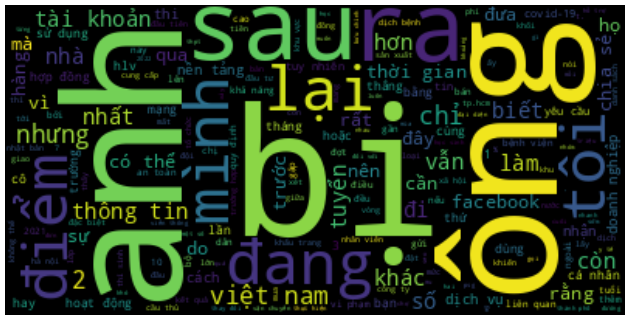

In [11]:
w1 = WordCloud().generate_from_frequencies(counter)
plt.figure(figsize=(16, 12), dpi=50)
plt.imshow(w1, interpolation="bilinear")
plt.axis("off")
plt.show()

Beautiful word cloud for most frequencies words in this corpus.

#### What are today words?

In [12]:
counter = analyzer.analyze_today_words(dataset)

Most common words
[(',', 221), ('.', 99), ('các', 86), ('của', 56), ('và', 51), ('người', 43), ('tài khoản', 41), ('thông tin', 40), ('để', 35), ('facebook', 32), ('đã', 32), ('cho', 32), ('số', 30), ('được', 29), ('trong', 29), ('đến', 26), ('trên', 26), ('nền tảng', 25), ('dịch vụ', 24), ('bị', 23), ('này', 22), ('có', 22), ('theo', 21), ('chia sẻ', 20), ('dùng', 20), ('với', 19), ('từ', 19), ('doanh nghiệp', 19), ('không', 18), ('những', 18), ('một', 18), ('là', 18), ('về', 18), ('”', 18), ('cá nhân', 18), ('an toàn', 17), ('“', 16), ('ngày', 16), ('khi', 15), ('sử dụng', 15), ('cung cấp', 14), ('viễn thông', 14), ('nhật bản', 14), ('lại', 13), ('mạng', 13), ('vận chuyển', 13), ('vào', 12), ('ra', 12), ('hoạt động', 12), ('biết', 12)]
Corpus words:  787
OOV words
{'đảng ldp', 'screen holdings', ':', '18/8', 'kt1', 'công an thành phố', '12', '5g', 'ngươi', 'covid-19', '31', 'tt&tt', 'group', 'arizona', 'an hải tây', '65', 'nhà sản xuất', '0', 'quang điện quang', 'phong tỏa', 'trung q

#### Remove some (potential) stopwords to get clearer Wordcloud

In [13]:
wordlist = [word for word in counter]
for word in wordlist:
    if word in stopwords or word in punctuations:
        del counter[word]

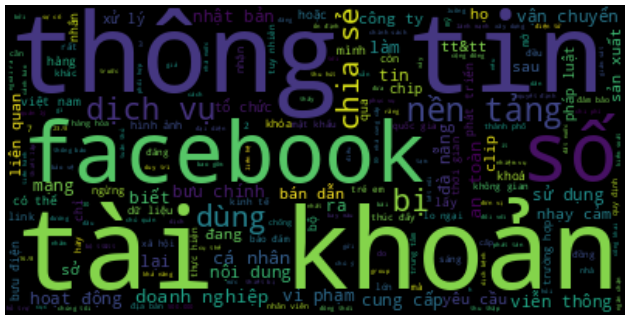

In [14]:
w1 = WordCloud().generate_from_frequencies(counter)
plt.figure(figsize=(16, 12), dpi=50)
plt.imshow(w1, interpolation="bilinear")
plt.axis("off")
plt.show()

## How to Contribute?

It's great that you find this project interesting. Even the smallest contribute is appreciated. Welcome to this exciting journey with us.

### You can contribute in so many ways!

* [Create more usefull open datasets](https://github.com/undertheseanlp/underthesea/tree/master/datasets/UD_Vietnamese-COL)
* [Create more actionable insights](https://github.com/undertheseanlp/underthesea/tree/master/datasets/UD_Vietnamese-COL)